In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [53]:
counties = gpd.read_file('./data/county/tncounty.shp')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


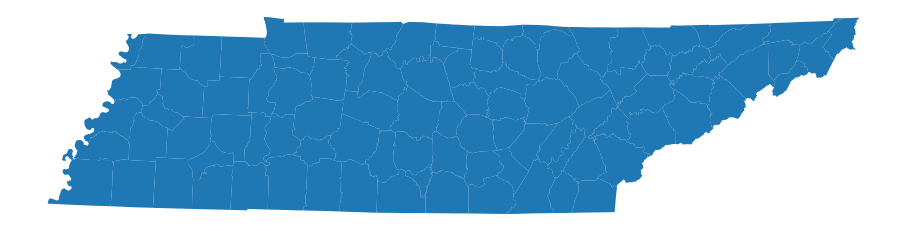

In [54]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [55]:
smoking = pd.read_csv('./data/health_rankings_2019.csv', usecols = ['County',
                                                                    'County Value',
                                                                    'County Code'])

smoking.head()

,County,County Value,County Code
0,Anderson,21%,47001
1,Bedford,21%,47003
2,Benton,23%,47005
3,Bledsoe,26%,47007
4,Blount,19%,47009


In [56]:
smoking_counties = pd.merge(left = counties, right = smoking, 
                    left_on = 'NAME', right_on = 'County')
smoking_counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,County,County Value,County Code
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,21%,47023
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,25%,47181
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,20%,47167
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton,20%,47065
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart,21%,47161


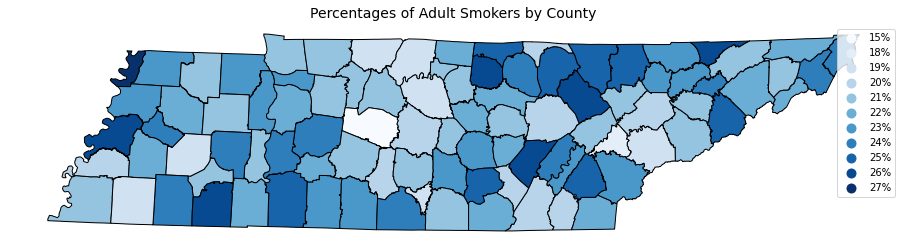

In [68]:
fig, ax = plt.subplots(figsize=(16,4))
smoking_counties.plot(column = 'County Value',
                cmap = 'Blues',
                edgecolor = 'black',
                legend = True,
                ax = ax)
plt.title('Percentages of Adult Smokers by County', fontsize = 14)

ax.axis('off');

In [69]:
obesity = pd.read_csv('./data/adult_obesity_2019.csv', usecols = ['County',
                                                                    'County Value',
                                                                    'County Code'])
obesity.head()

,County,County Value,County Code
0,Anderson,32%,47001
1,Bedford,33%,47003
2,Benton,35%,47005
3,Bledsoe,35%,47007
4,Blount,35%,47009


In [70]:
obesity_counties = pd.merge(left = counties, right = obesity, 
                    left_on = 'NAME', right_on = 'County')
obesity_counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,County,County Value,County Code
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,33%,47023
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,33%,47181
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,36%,47167
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton,31%,47065
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart,33%,47161


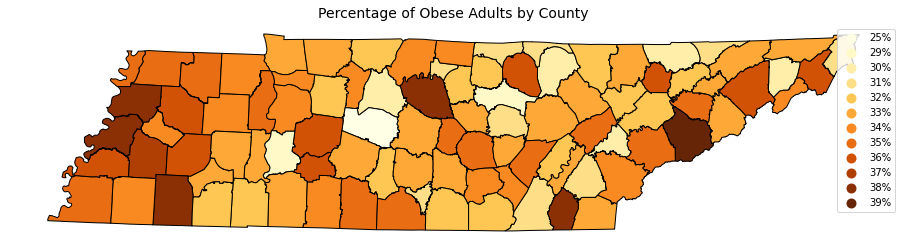

In [71]:
fig, ax = plt.subplots(figsize=(16,4))
obesity_counties.plot(column = 'County Value',
                cmap = 'YlOrBr',
                edgecolor = 'black',
                legend = True,
                ax = ax)
plt.title('Percentage of Obese Adults by County', fontsize = 14)

ax.axis('off');

In [62]:
inactivity = pd.read_csv('./data/adult_inactivity_2019.csv', usecols = ['County',
                                                                    'County Value'])
inactivity.head()

,County,County Value
0,Anderson,28%
1,Bedford,33%
2,Benton,32%
3,Bledsoe,29%
4,Blount,26%


In [63]:
inactive_counties = pd.merge(left = counties, right = inactivity, 
                    left_on = 'NAME', right_on = 'County')
obesity_counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,County,County Value,County Code
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,33%,47023
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,33%,47181
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,36%,47167
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton,31%,47065
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart,33%,47161


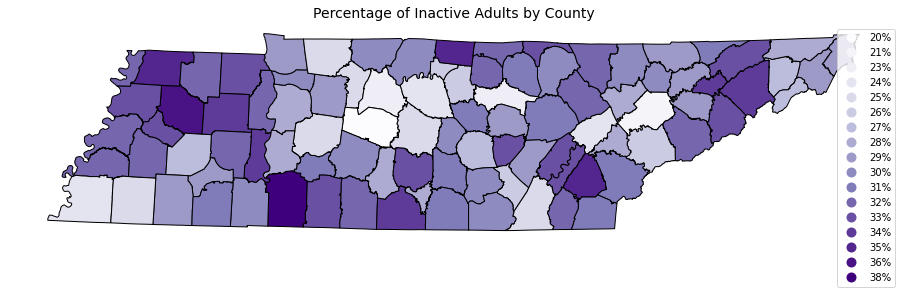

In [64]:
fig, ax = plt.subplots(figsize=(16,4))
inactive_counties.plot(column = 'County Value',
                cmap = 'Purples',
                edgecolor = 'black',
                legend = True,
                ax = ax)
plt.title('Percentage of Inactive Adults by County', fontsize = 14)

ax.axis('off');

In [65]:
drinking = pd.read_csv('./data/adult_drinking_2019.csv', usecols = ['County',
                                                                    'County Value'])
drinking.head()

,County,County Value
0,Anderson,14%
1,Bedford,15%
2,Benton,12%
3,Bledsoe,14%
4,Blount,14%


In [66]:
drinking_counties = pd.merge(left = counties, right = inactivity, 
                    left_on = 'NAME', right_on = 'County')
drinking_counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,County,County Value
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,29%
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,38%
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,32%
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton,25%
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart,29%


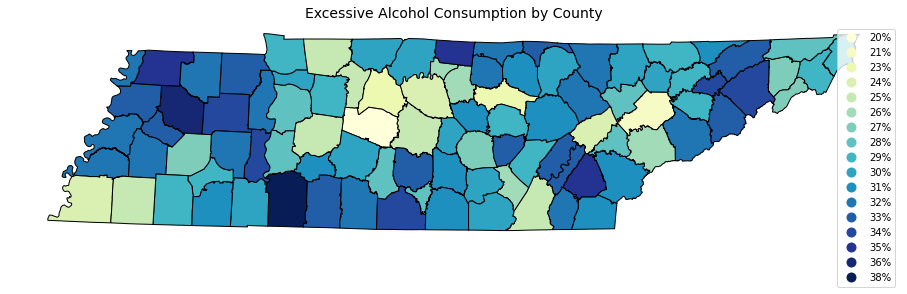

In [67]:
fig, ax = plt.subplots(figsize=(16,4))
drinking_counties.plot(column = 'County Value',
                cmap = 'YlGnBu',
                edgecolor = 'black',
                legend = True,
                ax = ax)
plt.title('Excessive Alcohol Consumption by County', fontsize = 14)

ax.axis('off');

In [74]:
smile_data = pd.read_csv('data/SmileOn11.28.2020.csv', skiprows = 2,  usecols = ['CallerNum',
                                                                                  'CountyName',
                                                                                 'PostalCode',
                                                                               'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
                                                                              'SMILE ON 60+ Site Information - Enroller ID',
                                                                              'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?',
                                                                              'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
                                                                              'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'])
smile_data.head(10)

,CallerNum,CountyName,PostalCode,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,3859874,Robertson,37172.0,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,Davidson,37212.0,NaN,NaN,NaN,NaN,NaN
2,2518680,Hawkins,37857.0,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,Shelby,38104.0,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,-1,NaN,NaN,NaN,Neighborhood Health - Lebanon,NaN,Yes,No
5,3605119,Sullivan,37664.0,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN
6,3859184,Wilson,37087.0,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN
7,3746643,Hawkins,37642.0,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN
8,3859184,Wilson,37087.0,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN
9,3858402,Shelby,38128.0,140 - Limited Oral evaluation - problem focuse...,Christ Community Health Services- Raleigh,Yes,No,NaN


In [88]:
smile_data["CountyName"].replace({"Dekalb": "De Kalb", "Mcminn": "Mc Minn"}, inplace=True)

In [89]:
smile_data.CountyName = smile_data.CountyName.str.lower()
counties.NAME = counties.NAME.str.lower()
patients = pd.merge(left = counties, right = smile_data, 
                    left_on = 'NAME', right_on = 'CountyName')
patients.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,CallerNum,CountyName,PostalCode,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,76,chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",2850045,chester,38340.0,NaN,NaN,NaN,NaN,NaN
1,76,chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",2530959,chester,38340.0,NaN,NaN,NaN,NaN,NaN
2,76,chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",2530949,chester,38340.0,NaN,NaN,NaN,NaN,NaN
3,76,chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",2530901,chester,38340.0,NaN,NaN,NaN,NaN,NaN
4,76,chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",2530752,chester,38340.0,NaN,NaN,NaN,NaN,NaN


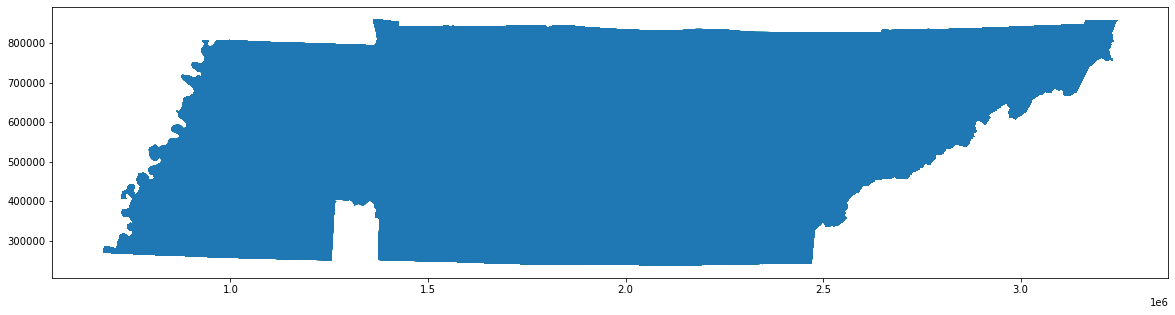

In [90]:
#fig, ax = plt.subplots(figsize=(16,4))
#patients.plot(column = 'CountyName',
#                cmap = 'Reds',
#                edgecolor = 'black',
#                legend = True,
#                ax = ax)
#plt.title('Patient Density By County', fontsize = 14)
#
#ax.axis('off');

ax = patients.plot(figsize = (20, 20), color = 'lightgreen')
patients.plot( ax = ax,);
plt.show();

In [ ]:
tn_health_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 12)
feature_group = folium.FeatureGroup(name='Smokers', show=True )
feature_group1 = folium.FeatureGroup(name='Obesity', show=False )
feature_group2 = folium.FeatureGroup(name='Inactivity', show=False)
feature_group3 = folium.FeatureGroup(name='Alcohol Consumption', show=False)
feature_group4 = folium.FeatureGroup(name='Smile On Patients', show=False)
storm_map.add_child(feature_group)
storm_map.add_child(feature_group1)
storm_map.add_child(feature_group2)
storm_map.add_child(feature_group3)
storm_map.add_child(feature_group4)
folium.GeoJson(smoking_counties,
               tooltip = GeoJsonTooltip(fields=['zip','per_capita_income'], #geometry dataframe info on over
                                                 aliases=['ZIP Code','Per Capita Income ($USD)'],
                                                 labels=True,
                                                 sticky=True,
                                                 toLocalestring=True)
              ).add_to(feature_group)
folium.GeoJson(poverty_tract,
               tooltip = GeoJsonTooltip(fields=['tract','cash_snap_asst','per_capita_income'],
                                                 aliases=['Tract #','# Households Rec. Public Asst.',
                                                         'Per Capita Income ($USD)'],
                                                 labels=True,
                                                 sticky=True,
                                                 toLocalestring=True)
              ).add_to(feature_group1)
folium.GeoJson(zip_per_capita,
               tooltip = GeoJsonTooltip(fields=['zip_code','per_capita_income'],
                                                 aliases=['ZIP Code','Per Capita Income ($USD)'],
                                                 labels=True,
                                                 sticky=True,
                                                 toLocalestring=True)
              ).add_to(feature_group2)
folium.GeoJson(poverty_tract,
               tooltip = GeoJsonTooltip(fields=['tract','cash_snap_asst','per_capita_income'],
                                                 aliases=['Tract #','# Households Rec. Public Asst.',
                                                         'Per Capita Income ($USD)'],
                                                 labels=True,
                                                 sticky=True,
                                                 toLocalestring=True)
              ).add_to(feature_group3)
folium.GeoJson(poverty_tract,
               tooltip = GeoJsonTooltip(fields=['tract','cash_snap_asst','per_capita_income'],
                                                 aliases=['Tract #','# Households Rec. Public Asst.',
                                                         'Per Capita Income ($USD)'],
                                                 labels=True,
                                                 sticky=True,
                                                 toLocalestring=True)
              ).add_to(feature_group4)
marker_cluster = MarkerCluster().add_to(feature_group)
marker_cluster1 = MarkerCluster().add_to(feature_group1)
marker_cluster2 = MarkerCluster().add_to(feature_group2)
marker_cluster3 = MarkerCluster().add_to(feature_group3)
marker_cluster4 = MarkerCluster().add_to(feature_group4)
for ind, row in tornado_calls.iterrows():
    point = [row['ALI Latitude'], row['ALI Longitude']]
    popup = row['Cell Tower Address']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='red',icon='phone',prefix='fa')).add_to(marker_cluster)
for ind, row in tornado_dispatch.iterrows():
    point = [row['Latitude1'], row['Longitude1']]
    popup = row['Location'] + row['IncidentTypeDescription1']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='blue',icon='ambulance',prefix='fa')).add_to(marker_cluster)
for ind, row in tornado_calls.iterrows():
    point = [row['ALI Latitude'], row['ALI Longitude']]
    popup = row['Cell Tower Address']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='red',icon='phone',prefix='fa')).add_to(marker_cluster1)
for ind, row in tornado_dispatch.iterrows():
    point = [row['Latitude1'], row['Longitude1']]
    popup = row['Location'] + row['IncidentTypeDescription1']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='blue',icon='ambulance',prefix='fa')).add_to(marker_cluster1)
for ind, row in derecho_calls.iterrows():
    point = [row['ALI Latitude'], row['ALI Longitude']]
    popup = row['Seizure DateTime'] + ':' + row['Cell Tower Address']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='red',icon='phone',prefix='fa')).add_to(marker_cluster2)
for ind, row in derecho_dispatch.iterrows():
    point = [row['Latitude1'], row['Longitude1']]
    popup = row['Location'] + row['IncidentTypeDescription1']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='blue',icon='ambulance',prefix='fa')).add_to(marker_cluster2)
for ind, row in derecho_calls.iterrows():
    point = [row['ALI Latitude'], row['ALI Longitude']]
    popup = row['Seizure DateTime'] + ':' + row['Cell Tower Address']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='red',icon='phone',prefix='fa')).add_to(marker_cluster3)
for ind, row in derecho_dispatch.iterrows():
    point = [row['Latitude1'], row['Longitude1']]
    popup = row['Location'] + row['IncidentTypeDescription1']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='blue',icon='ambulance',prefix='fa')).add_to(marker_cluster3)
for ind, row in wireless.iterrows():
    point = [row['ALI Latitude'], row['ALI Longitude']]
    popup = row['Cell Tower Address']
    folium.Marker(point, popup = popup, icon=folium.Icon(color='black')).add_to(marker_cluster4)
# turn on layer control
storm_map.add_child(folium.map.LayerControl(collapsed = False))

